## Coulomb Stopping Powers

Module stoppingpower contains routines for numerical integration of stopping powers for incident charged particles Coulomb scattering off a $T=0$ Fermi sea of electrons.  No asumptions are made about the incident particle's mass or initial kinematics.   

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,10]

import stoppingpower as sp

In [3]:
m_electron = 0.5 # MeV
Z_electron = -1.0 # charge

n_electron = 10**32 # cm^{-3}, electron number density

M_carbon = 10**4 # MeV
Z_carbon = 6.0
M_pion = 10**2 # Mev
Z_pion = 1.0

Initialize Fermi Sea properties, and construct stopping power functions

In [4]:
wd = sp.FermiSea_StoppingPower(m=m_electron, n0=n_electron, 
                               masstolength=sp.MeV_to_InvCM)
dedx_carbon_func = wd.get_ion_coulomb_stopping_power(M_carbon, Z_carbon)
dedx_pion_func = wd.get_ion_coulomb_stopping_power(M_pion, Z_pion)

Stopping power functions accept an (array of) incident kinetic energy and do a monte carlo integral over electron momentum, direction, and com scattering angle.  

In [5]:
dedx_carbon_func(100.0, samples=100)

array([[-16315.66519115],
       [ 15986.02181296]])

In [6]:
timeit dedx_carbon_func([10.0**-2, 1.0, 100.0, 10**4, 10**6], samples=100)

10 loops, best of 3: 115 ms per loop


For some reason stopping powers all come out negative - not sure why, ought to check into this.  The definiton of 'energy transfer' is the obvious place, but that seems correct.

Timing: 0.02 sec per 100 samples. 
Need at least 10^5 samples for percent-level accuracy - thats at least 20 sec per calculation or about 3 hours to construct a 500 point plot. 

#### carbon ion and pion tests


In [41]:
ke = np.logspace(-4, 9, 100)  # 100 samples log-spaced between 10^-4 and 10^9
dedx_carbon, dedx_carbon_error = dedx_carbon_func(ke, samples=10**5, important=True)
dedx_pion, dedx_pion_error = dedx_pion_func(ke, samples=10**5, important=True)

# flip the stupid signs 
dedx_carbon *= -1.0
dedx_pion *= -1.0

stoppingpower can also construct an approximate function based on the limiting cases of small or large incident momentum, both in the limit of a heavy incident and relativistic targets ('high density'). The function high_density_limiting is the quadrature sum of these two limits. 

The low energy limit is valid as long as incident momentum is non-relativisitc and greater than the target momentum (and maybe greater than the target mass as well...not sure).  This is Paul's esitmate - gives ke^{1/2}.  The high energy limit takes the electrons to be at rest and the incident to be highly relaticistic, which gives a constant a la Jackson. 

In [9]:
dedx_carbon_limiting_func = wd.high_density_limiting(M_carbon, Z_carbon)
dedx_pion_limiting_func = wd.high_density_limiting(M_pion, Z_pion)

def momentum_threshold(p_electron, M_ion):
    """ The minimum incident momentum at which the low-energy PR estimate is valid """
    return (p_electron**2)/(2*M_ion)

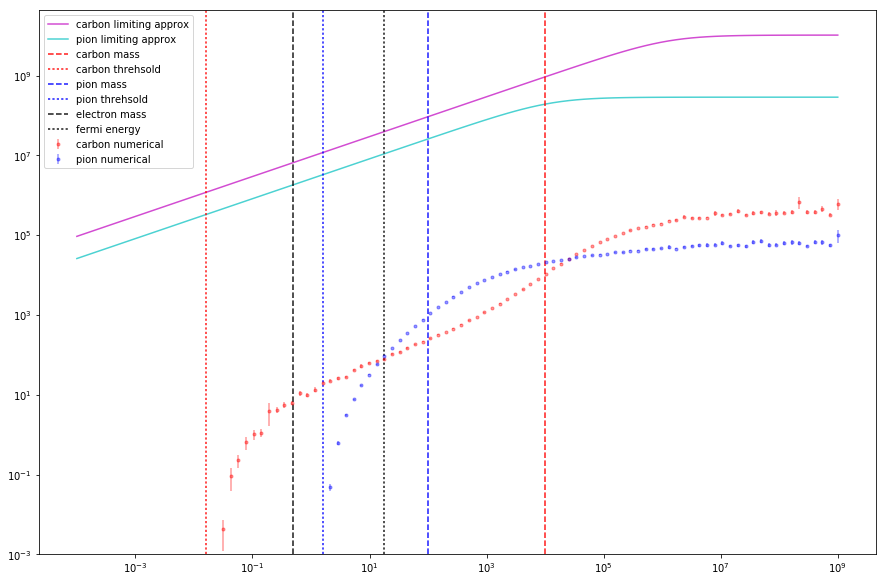

In [42]:
fig, ax = plt.subplots()

# numerical results 
ax.errorbar(ke, dedx_carbon, yerr=dedx_carbon_error, alpha=0.4,
            marker='.', linestyle='', color='r', label='carbon numerical')
ax.errorbar(ke, dedx_pion, yerr=dedx_pion_error, alpha=0.4,
            marker='.', linestyle='', color='b', label='pion numerical')
# limiting approximations
ax.plot(ke, dedx_carbon_limiting_func(ke), alpha=0.7,
        marker='', linestyle='-', color='m', 
        label='carbon limiting approx')
ax.plot(ke, dedx_pion_limiting_func(ke), alpha=0.7,
        marker='', linestyle='-', color='c',
        label='pion limiting approx')
# significant energy scales 
ax.axvline(M_carbon, linestyle='--', color='r', alpha=0.9, label="carbon mass")
ax.axvline(momentum_threshold(wd.pfermi, M_carbon), linestyle=':', color='r', alpha=0.9, label="carbon threhsold")
ax.axvline(M_pion, linestyle='--', color='b', alpha=0.9, label="pion mass")
ax.axvline(momentum_threshold(wd.pfermi, M_pion), linestyle=':', color='b', alpha=0.9, label="pion threhsold")
ax.axvline(wd.m, linestyle='--', color='k', alpha=0.9, label="electron mass")
ax.axvline(wd.Efermi, linestyle=':', color='k', alpha=0.9, label="fermi energy")

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc="best")

In [40]:
wd.pfermi**3

5643.137755284463